# Lab Réseaux de Neurones (Part 1)

## Construction d’un neurone à seuil

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class Neurone_a_seuil:
    
    def __init__(self, n_input):
        self.poids=np.zeros((n_input,1))
        self.biais=0
        self.fct_passage=sigmoid
    def set_weights(self,b,w):
        self.poids=w
        self.biais=b
    def set_function(self,fct):
        self.fct_passage=fct
    def get_output(self,x):
        return self.fct_passage(np.dot(self.poids.T,x)+self.biais)
    def compute_cost(self,x,y):
        m=x.shape[1]
        cost=(-1/m)*(np.dot(np.log(self.get_output(x)),y.T)+np.dot(np.log(1-self.get_output(x)),(1-y).T))
        cost=np.squeeze(cost)
        return cost
    def compute_gradients(self,x,y):
        m=x.shape[1]
        dw=(1/m)*np.dot(x,(self.get_output(x)-y).T)
        db=(1/m)*np.sum(self.get_output(x)-y.T)
        return dw, db
    def optimize(self,x,y,num_iterations, learning_rate):
        costs=[]
        for i in range(num_iterations):
            dw, db=self.compute_gradients(x,y)
            cost=self.compute_cost(x,y)
            w=self.poids-learning_rate*dw
            b=self.biais-learning_rate*db
            self.set_weights(b,w)
            costs.append(cost)
            print('cost after iteration{}:{}'.format(i,cost))
        np.squeeze(costs)
        plt.plot(costs)
    def predict(self,x):
        m=x.shape[1]
        predictions=np.zeros((1,m))
        a=self.get_output(x)
        predictions[a>0.5]=1
        return predictions
      
            
            

## Réseaux de neurones linéaires à seuil

In [15]:
def linear_output(x):
    return x

In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [17]:
neurone=Neurone_a_seuil(2)
neurone.set_weights(-30, np.array([[20],[20]]))
neurone.set_function(linear_output)

In [18]:
x=np.array([[0,0],[0,1],[1,0],[1,1]]).T

In [19]:
neurone.get_output(x)

array([[-30, -10, -10,  10]])

In [20]:
x=np.array([[1,1,1,1,1,1,0],[0,1,1,0,0,0,0],[1,1,0,1,1,0,1],[1,1,1,1,0,0,1],[0,1,1,1,0,1,1],[1,0,1,1,0,1,1],[1,0,1,1,1,1,1],[1,1,1,0,0,0,0],[1,1,1,1,1,1,1],[1,1,1,1,0,1,1]]).T

In [21]:
y=np.array([[0,1,0,1,0,1,0,1,0,1]])

In [22]:
y.shape

(1, 10)

cost after iteration0:3.4079709825777194
cost after iteration1:1.7081516778269983
cost after iteration2:1.0148921078919868
cost after iteration3:0.9553428832220888
cost after iteration4:0.900748840388636
cost after iteration5:0.8505242599512735
cost after iteration6:0.8043914527577827
cost after iteration7:0.7621447364841585
cost after iteration8:0.7235461814605921
cost after iteration9:0.6883421937411266
cost after iteration10:0.6562603060191966
cost after iteration11:0.6270260303410966
cost after iteration12:0.6003691416322199
cost after iteration13:0.5760323348314715
cost after iteration14:0.5537752232448903
cost after iteration15:0.5333772896080201
cost after iteration16:0.5146387649014564
cost after iteration17:0.4973805004283808
cost after iteration18:0.48144301008081086
cost after iteration19:0.4666850595394936
cost after iteration20:0.45298202940942556
cost after iteration21:0.4402242039512112
cost after iteration22:0.42831510018534485
cost after iteration23:0.4171698932794507


cost after iteration315:0.06027158128497156
cost after iteration316:0.06010068563237741
cost after iteration317:0.05993075568068273
cost after iteration318:0.05976178321236242
cost after iteration319:0.05959376010366407
cost after iteration320:0.059426678323264426
cost after iteration321:0.05926052993094791
cost after iteration322:0.05909530707630888
cost after iteration323:0.05893100199747531
cost after iteration324:0.05876760701985521
cost after iteration325:0.05860511455490337
cost after iteration326:0.058443517098910006
cost after iteration327:0.0582828072318092
cost after iteration328:0.05812297761600818
cost after iteration329:0.05796402099523558
cost after iteration330:0.057805930193409696
cost after iteration331:0.057648698113525354
cost after iteration332:0.05749231773655933
cost after iteration333:0.057336782120394364
cost after iteration334:0.05718208439876069
cost after iteration335:0.05702821778019518
cost after iteration336:0.05687517554701778
cost after iteration337:0.05

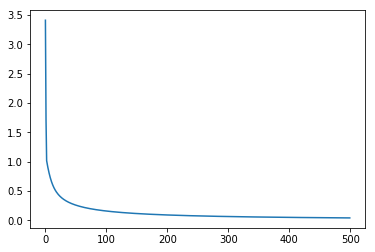

In [27]:
neurone=Neurone_a_seuil(7)
neurone.set_weights(1, np.array([[1,1,1,1,1,1,1]]).T)
neurone.set_function(sigmoid)
neurone.optimize(x,y,500,0.5)

In [28]:
neurone.predict(x)

array([[0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]])